In [1]:
# Import the Pandas package
import pandas as pd
# Import the NumPy package
import numpy as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics

import folium  #needed for interactive map
from folium.plugins import HeatMap

import re


%matplotlib inline
sns.set()

In [2]:
# Load a file as a DataFrame and assign to df
green_trips_df = pd.read_csv('uber_trips_2015/uber_trips_2015.csv')

In [3]:
green_trips_df.shape

(14270479, 4)

In [4]:
green_trips_df.columns

Index(['pickup_datetime', 'pickup_location_id', 'dispatch_base',
       'affiliate_base'],
      dtype='object')

In [5]:
green_trips_df.isnull().sum()

pickup_datetime            0
pickup_location_id         0
dispatch_base              0
affiliate_base        162195
dtype: int64

In [6]:
#green_trips_df[['passenger_count', 'trip_distance','total_amount']].describe().apply("{0:.2f}".format)
green_trips_df['affiliate_base'].describe()
#green_trips_df['total_amount'].quantile(q=0.95)

count     14108284
unique         284
top         B02764
freq       4352321
Name: affiliate_base, dtype: object

In [8]:
green_trips_df['pickup_datetime_dt'] = pd.to_datetime(green_trips_df['pickup_datetime'])

In [9]:
green_trips_df['pickup_datetime'].describe()#.apply("{0:.2f}".format)

count                14270479
unique                2744783
top       2015-06-27 22:19:00
freq                      213
Name: pickup_datetime, dtype: object

In [10]:
#green_trips_df['pickup_datetime'].describe()#.apply("{0:.2f}".format)
green_trips_df['YYYY'] = green_trips_df['pickup_datetime_dt'].apply(lambda x: x.strftime('%Y') )
green_trips_df['MM'] = green_trips_df['pickup_datetime_dt'].apply(lambda x: x.strftime('%m') )

In [11]:
green_trips_df['YYYYMM'] = green_trips_df['pickup_datetime'].apply(lambda x: str(x)[0:4] + str(x)[5:7])

In [12]:
green_trips_df['DD'] = green_trips_df['pickup_datetime_dt'].apply(lambda x: x.strftime('%d') )

In [13]:
green_trips_df['Hour'] = green_trips_df['pickup_datetime_dt'].apply(lambda x: x.strftime('%H'))

In [14]:
#print(re.finditer(r'/',green_trips_df['pickup_datetime'][0])[0])
#re.finditer
#green_trips_df['pickup_datetime'][0][:green_trips_df['pickup_datetime'][0].find(r'/')]
#green_trips_df['pickup_datetime'][0][0]
#green_trips_df['pickup_datetime'][0][:green_trips_df['pickup_datetime'][0].find(r'/')]
#pd.DataFrame([a[:a.find(r'/')] for a in green_trips_df['pickup_datetime']])[0].unique()
#green_trips_df['pickup_datetime'][0].find_all(r'/')
green_trips_df['Hour'].unique()

array(['09', '10', '15', '05', '00', '17', '01', '11', '22', '02', '14',
       '16', '18', '12', '13', '20', '19', '04', '08', '21', '23', '06',
       '03', '07'], dtype=object)

In [15]:
green_trips_df.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,pickup_datetime_dt,YYYY,MM,YYYYMM,DD,Hour
0,2015-05-17 09:47:00,141,B02617,B02617,2015-05-17 09:47:00,2015,05,201505,17,09
1,2015-05-17 09:47:00,65,B02617,B02617,2015-05-17 09:47:00,2015,05,201505,17,09
2,2015-05-17 09:47:00,100,B02617,B02617,2015-05-17 09:47:00,2015,05,201505,17,09
3,2015-05-17 09:47:00,80,B02617,B02774,2015-05-17 09:47:00,2015,05,201505,17,09
4,2015-05-17 09:47:00,90,B02617,B02617,2015-05-17 09:47:00,2015,05,201505,17,09


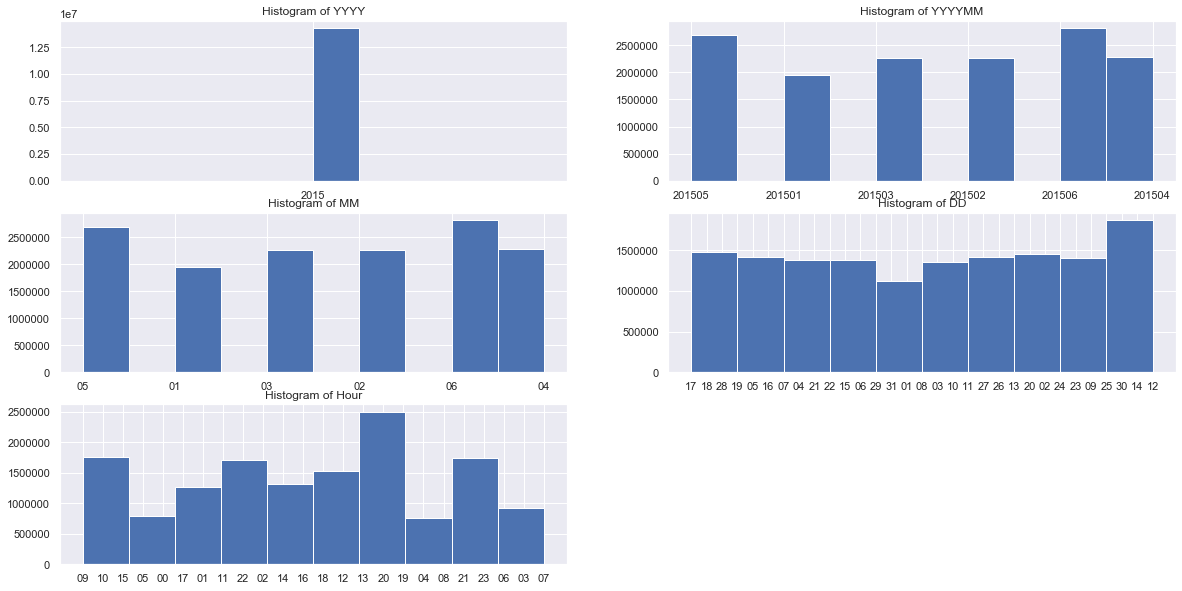

In [16]:
plt.figure(figsize=(20,10))
vars_to_plot = ['YYYY', 'YYYYMM', 'MM', 'DD', 'Hour']
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 2,i+1)
    plt.hist(green_trips_df[var],10)
    title_string = "Histogram of " + var
    plt.title(title_string)

(array([1357019., 1311730., 1358425., 1387699., 1467696., 1465431.,
        1497775., 1404205., 1434907., 1585592.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

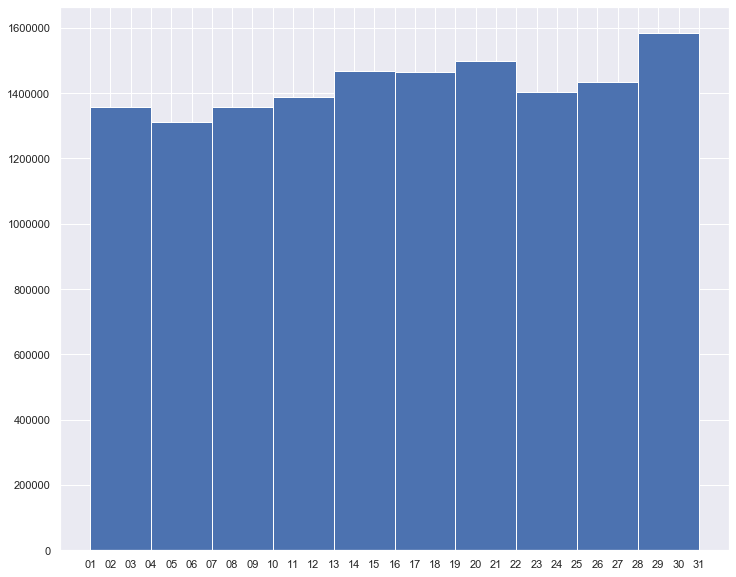

In [17]:
plt.figure(figsize=(12,10))
plt.hist(green_trips_df['DD'].sort_values())